In [ ]:
%pip install roboflow --break-system-packages

In [1]:
from matplotlib import pyplot as plt
from ultralytics import YOLO
from roboflow import Roboflow
import numpy as np
import cv2
import os

In [ ]:
rf = Roboflow(api_key="xfrYuTKsBzPt4fTpwX0r")

In [ ]:
model = YOLO("model/yolov8s.pt")
# model = YOLO("/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train20/weights/best.pt")
model.to("cuda:0")

In [ ]:
project = rf.workspace("worker-lod8r").project("parking-space-cgi5j")
dataset = project.version(1).download("yolov8")

In [ ]:
model.train(data=f"./datasets/Parking-Space-1/data.yaml", epochs=3, workers=8, batch=8)
# /home/writer/Documents/university/2-3 summer school/Parking-Space-1/data.yaml

# Detection

In [2]:
model = YOLO("yolov5/runs/detect/train29/weights/best.pt")
model.to("cuda:0")

def detect(source):
    cap = cv2.VideoCapture(source)
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Make detections 
        # results = model(frame)
        results = model.predict(frame)
        print(results)
        
        cv2.imshow('YOLO', np.squeeze(results[0].plot()))
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

## Real Time Detections

In [ ]:
detect(0)

## Video Detection with preview

In [ ]:
detect('./datasets/data/videoplayback.mp4')


In [ ]:
!yolo task=detect mode=predict model=yolov5/runs/detect/train29/weights/best.pt conf=0.25 source=./datasets/data/videoplayback.mp4



image 1/1 /home/writer/Documents/university/2-3 summer school/800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg: 448x640 16 GateOpeneds, 53.9ms
Speed: 2.0ms preprocess, 53.9ms inference, 71.9ms postprocess per image at shape (1, 3, 640, 640)


1
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'keys', 'masks', 'names', 'new', 'numpy', 'orig_img', 'orig_shape', 'pandas', 'path', 'plot', 'probs', 'save_crop', 'save_txt', 'speed', 'to', 'tojson', 'update', 'verbose']
/home/writer/Documents/university/2-3 summer school/800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg


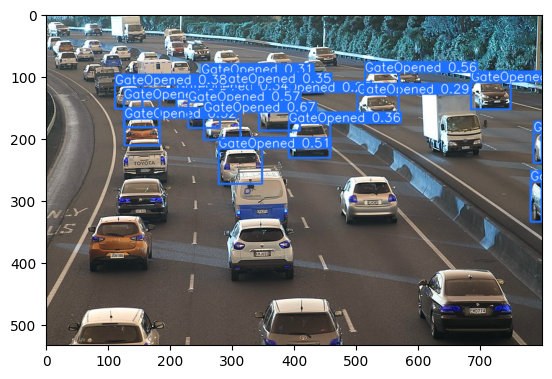

In [3]:
# results = model.predict('/home/writer/Documents/university/2-3 summer school/datasets/data/image-010.jpeg')
results = model.predict('/home/writer/Documents/university/2-3 summer school/800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg')
# results = model.predict('/home/writer/Documents/university/2-3 summer school/datasets/data/train/images/image-039.jpeg', show=True)
# results = model.predict('/home/writer/Documents/university/2-3 summer school/datasets/archive_road_signs/ts/ts/00006.jpg', show=True)
# results = model.predict('/home/writer/Documents/university/2-3 summer school/datasets/weapon/valid/images/2-126-_jpg.rf.e7c4d9dafeb680a86f755c7d91faf098.jpg', show=True)
# results = model.predict('/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/val11/val_batch1_pred.jpg', show=True)

%matplotlib inline 
print(len(results))
for res in results:
    print(dir(res))
    print(res.path)
    plt.imshow(np.squeeze(res.plot()))
    plt.show()